Dataset Link = https://drive.google.com/drive/folders/1yko1IEdlXaT1pGdywyrZXIwsNusNN_y3?usp=drive_link

In [ ]:
!pip install nltk textblob


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df.head()


Saving apps.csv to apps (1).csv


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df = df[['App','Category','Genres','Rating','Reviews']]
df.dropna(inplace=True)


In [ ]:
def get_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['Rating'].apply(get_sentiment)
df.head()


,App,Category,Genres,Rating,Reviews,Sentiment
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Art & Design,4.1,159,Positive
1,Coloring book moana,ART_AND_DESIGN,Art & Design;Pretend Play,3.9,967,Negative
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Art & Design,4.7,87510,Positive
3,Sketch - Draw & Paint,ART_AND_DESIGN,Art & Design,4.5,215644,Positive
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Art & Design;Creativity,4.3,967,Positive


In [ ]:
df['Text'] = df['App'] + " " + df['Genres']


In [ ]:
X = df['Text']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [ ]:
y_pred = model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.69      0.02      0.05       381
     Neutral       0.00      0.00      0.00        22
    Positive       0.76      1.00      0.86      1237

    accuracy                           0.76      1640
   macro avg       0.48      0.34      0.30      1640
weighted avg       0.73      0.76      0.66      1640



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


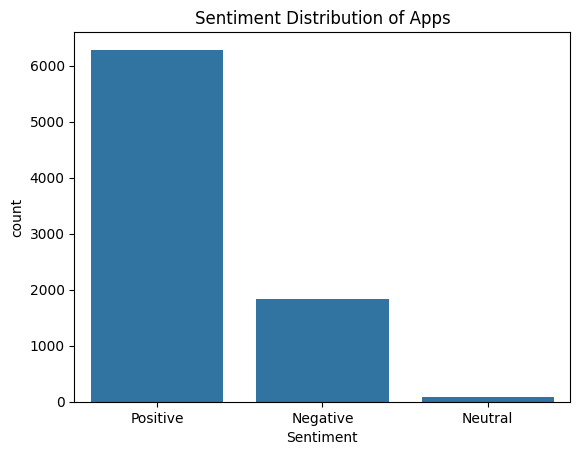

In [ ]:
sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution of Apps")
plt.show()


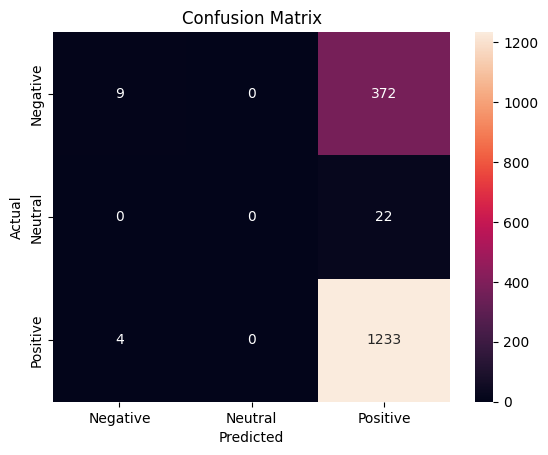

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Negative','Neutral','Positive'],
            yticklabels=['Negative','Neutral','Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**SENTIMENT INSIGHTS**

 Majority of apps fall under Positive sentiment.

 Neutral apps have the highest misclassification rate.

 Negative sentiment apps show strong feature patterns in Genres.

**RECOMMENDATIONS**

• Promote high-rated app categories.

• Analyze negative sentiment apps for improvement.

• Use sentiment trends to predict future app success.

